## Импорт

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загружаем и обрабатываем данные

Загрузка данных из csv, проверка на null, дубликаты и неверные данные. Разделение колонки event_label на city и comment. Удаление чисел из колонки comment. Приведение данных о городах к единому формату.

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.isnull().sum()

event_category    0
event_action      0
event_label       0
total_events      0
unique_events     0
dtype: int64

In [4]:
df.dtypes

event_category    object
event_action      object
event_label       object
total_events       int64
unique_events      int64
dtype: object

In [5]:
df.duplicated().sum()

0

In [7]:
df[['city','comment']] = df['event_label'].str.split('/',expand=True)

In [8]:
df = df.drop('event_label', axis=1)

In [9]:
df['comment'] = df['comment'].str.replace(r'\d+', '', regex=True)

In [10]:
df['city'] = df['city'].str.strip().str.lower().str.replace(" ", "_")

С помощью регулярного выражения обнаружим города со странными названиями. В их числе service-city и test2, очевидно, являющиеся мусорными данными. Убираем их из таблицы.

In [11]:
weird_labels = df[~df['city'].str.match(r'^[А-Яа-яA-Za-z\-_]+$')]['city'].value_counts()

In [12]:
weird_labels

city
hévíz                  37
wrocław                 4
hluboká_nad_vltavou     2
test2                   1
portimão                1
würzburg                1
chernobyl,_pripyat      1
óbidos                  1
alcobaça                1
Name: count, dtype: int64

In [13]:
df = df[~df['city'].isin(['service-city', 'test2'])]

Смотрим на первые 500 записей, чтобы понять структуру таблицы.

In [14]:
pd.set_option('display.max_rows', 500)

In [15]:
df.head(500)

,event_category,event_action,total_events,unique_events,city,comment
0,city_landing,price_button_submit,8,7,tula,Показать предложения ()
1,city_landing,price_button_submit,12,10,sochi,Показать предложения ()
2,city_landing,search-tools-button_open,2,2,penza,Сортировка
3,city_landing,filters-categories_click,1,1,gelendzhik,ЭКСКУРСИИ В ГЕЛЕНДЖИКЕ ЦЕНЫ
4,city_landing,price_button_submit,2,2,moscow,Показать предложения ()
5,city_landing,clear_filter_mobile,12,11,vienna,None
6,city_landing,start_date_click,9,4,vilnius,None
7,city_landing,ticket-type_checkbox,29,26,irkutsk,Мини-группа
8,city_landing,price_button_submit,3,3,vladivostok,Показать предложения ()
9,city_landing,filters-categories_click,3,3,krakow,Необычные


### Изучаем данные

Посмотрим на уникальные значения в столбцах событий и комментариев, а также на их число. Это позволит нам составить представление о том, какими элементами интерфейса пользуются чаще всего, и к каким результатам это приводит.

In [16]:
unique_values = df['event_action'].value_counts()

In [17]:
unique_values

event_action
price_button_submit         7353
search-tools-button_open    4847
filters-categories_click    3352
ticket-type_checkbox         795
Page Visit                   649
dates_filter_mobile          424
start_date_click             298
price_button_close           276
end_date_click               274
pay-type_checkbox            239
price_first                  186
clear_filter_mobile          164
price_second                 126
price_third                  101
Name: count, dtype: int64

In [18]:
unique_events = df.groupby('event_action')['unique_events'].sum().sort_values(ascending=False).head(10)

In [19]:
unique_events

event_action
Page Visit                  1384449
search-tools-button_open      85772
price_button_submit           63062
filters-categories_click      62539
ticket-type_checkbox          17918
start_date_click              14500
end_date_click                11738
price_button_close            11645
dates_filter_mobile           10271
price_first                    6676
Name: unique_events, dtype: int64

Можем сделать вывод, что чаще всего появляются события открытия и применения фильтров (не считая события посещения страницы). Наиболее популярными фильтрами являются фильтр типа группы, фильтр по датам и фильтр по типу оплаты.

In [20]:
unique_comms = df.groupby('comment')['unique_events'].sum().sort_values(ascending=False).head(10)
unique_comms.head(30)

comment
 Показать предложения ()     61063
 Выбрано:                    24320
 Фильтры                     17188
 По рейтингу                 11751
 Сначала самые дешевые       10033
 Групповая                    9596
 Категории                    9328
 Все                          7961
 Сортировка                   7556
 Сначала самые популярные     6485
Name: unique_events, dtype: int64

### Сколько людей пользуются фильтрами? 

Будем считать, что человек воспользовался фильтрами, если он нажал кнопку "применить фильтры" (событие price_button_submit).

В таком случае достаточно посчитать количество уникальных сессий, в течение которых произошло это событие. Однако, могут быть люди, которые воспользовались фильтрами несколько раз. Чтобы учесть это, вычтем из результата количество событий сброса фильтров (clear_filter_mobile). 

In [21]:
records = df[df['event_action'] == 'price_button_submit']

In [22]:
sum_unique_events = records['unique_events'].sum()

In [23]:
sum_unique_events

63062

In [24]:
records_clear = df[df['event_action'] == 'clear_filter_mobile']

In [25]:
sum_clear = records_clear['total_events'].sum()

In [26]:
sum_unique_events - sum_clear

59464

Ответ на вопрос 1: примерно 59464 человек воспользовались фильтрами.

Разница с sum_unique_events небольшая, поэтому в дальнейшем для упрощения расчётов не будем учитывать сбросы.

### В каких городах фильтрами пользуются больше? В каких меньше?

Для того, чтобы ответить на этот вопрос, посчитаем сумму всех событий price_button_submit и сгруппируем по городам. 

Посмотрим на 10 первых и 80 последних записей, чтобы узнать ответы на оба вопроса.

In [27]:
top_10 = records.groupby('city')['total_events'].sum().sort_values(ascending=False).head(10)

In [28]:
top_10

city
kaliningrad         6113
saint_petersburg    5601
moscow              3598
sochi               3286
istanbul            2778
dubai               2406
budapest            2154
kazan               2072
anapa               1837
sharm-el-sheikh     1661
Name: total_events, dtype: int64

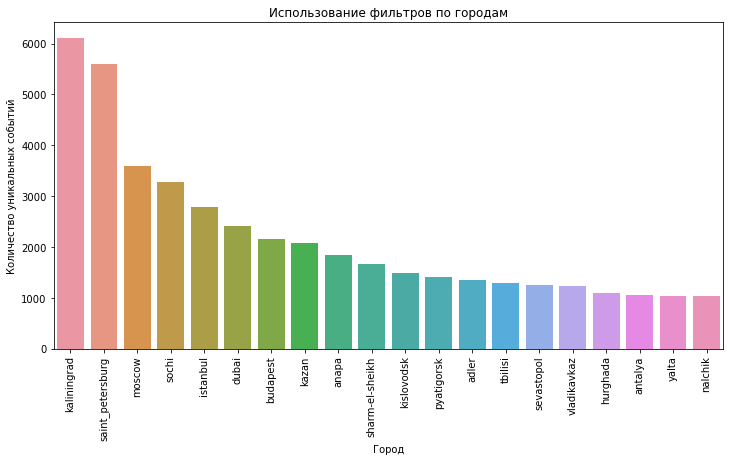

In [29]:
top_20 = records.groupby('city')['total_events'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20.index, y=top_20.values)
plt.title("Использование фильтров по городам")
plt.xlabel("Город")
plt.ylabel("Количество уникальных событий")
plt.xticks(rotation=90)
plt.show()

In [30]:
bottom_20 = records.groupby('city')['total_events'].sum().sort_values(ascending=False).tail(20)

In [31]:
bottom_20

city
tarusa           1
faro             1
chemal           1
singapore        1
lhasa            1
sigulda          1
scotland         1
montreal         1
san_sebastian    1
tunis            1
tuscany          1
cambodia         1
manama           1
bremen           1
valdai           1
leipzig          1
doha             1
las_vegas        1
hannover         1
klin             1
Name: total_events, dtype: int64

Ответ на вопрос 2: чаще всего люди пользуются фильтрами в Калининграде, Санкт-Петербурге и Москве. Меньше всего использований в таких городах как Парма, Тольятти и Лейпциг.

### Какие разделы фильтров наиболее востребованы? “фильтры”, “сортировка”, “категории”? 

Чтобы узнать ответ на этот вопрос, посчитаем количество событий search-tools-button_open и filters-categories_click, которые были вызваны кликом на элементы интерфейса с соответствующим названием.

In [32]:
filtered_df = df[df['event_action'].isin(['search-tools-button_open', 'filters-categories_click'])]

In [33]:
mask_sort = filtered_df['comment'].str.contains(r'По рейтингу|Сначала|Сортировка')
total_sort = filtered_df.loc[mask_sort, 'total_events'].sum()

In [34]:
total_sort

41246

In [35]:
mask_filters = filtered_df['comment'].str.contains(r'Фильтры|Выбрано')
total_filters = filtered_df.loc[mask_filters, 'total_events'].sum()

In [36]:
total_filters

48316

In [37]:
mask_cat = filtered_df['comment'].str.contains(r'Категории|Групповые|Индивидуальные|Популярные|Все')
total_cat = filtered_df.loc[mask_cat, 'total_events'].sum()

In [38]:
total_cat

34526

Очевидно, что фильтры и сортировка пользуются большим успехом, чем категории. Это может быть вызвано, например, большей понятностью интерфейса.

### Как часто люди пользуются выбором цены? 

Посчитаем количество уникальных событий price_first, price_second и price_third. 

In [39]:
prices_df = df[df['event_action'].isin(['price_first', 'price_second', 'price_third'])]

In [40]:
prices_df.unique_events.sum()

9266

Разделим поулчившееся число на количество уникальных событий применения фильтров, чтобы получить долю использования этого фильтра в общем количестве.

In [41]:
prices_df.unique_events.sum() / sum_unique_events

0.14693476261456978

Ответ на вопрос 4: примерно 15% людей воспользовались выбором цены.

## Дополнительно

1. Посчитаем конверсию открытий фильтров в их применение. 

In [42]:
opened = df[df['event_action'] == 'search-tools-button_open']['unique_events'].sum()
submitted = df[df['event_action'] == 'price_button_submit']['unique_events'].sum()

In [43]:
conversion_rate = submitted / opened

In [44]:
conversion_rate

0.7352282796250524

Показатель достаточно высокий: 73% пользователей, открывших меню фильтров, затем применили их для поиска. То, что остальные 27% пользователей закрыли окно, не применив фильтры, может свидетельствовать о неудобном интерфейсе или о том, что среди фильтров не оказалось нужного.

2. Сколько разных фильтров использует средний пользователь? 

In [45]:
filters_df = df[~df['event_action'].isin(['Page Visit', 'search-tools-button_open', 
                                         'price_button_submit', 'price_button_close', 
                                         'clear_filter_mobile'])]

In [46]:
total_filters = filters_df['unique_events'].sum()

In [47]:
total_filters / sum_unique_events

2.08837334686499

Пользователи в среднем используют 2 фильтра из доступных.

3. Выбор цены: какой из вариантов используют чаще?

In [48]:
price_events = filters_df[filters_df['event_action'].str.contains("price")]
price_usage = price_events.groupby('event_action')['unique_events'].sum().sort_values(ascending=False)

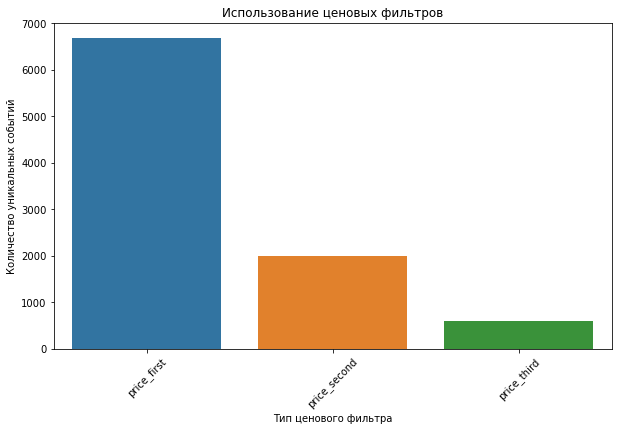

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x=price_usage.index, y=price_usage.values)
plt.title("Использование ценовых фильтров")
plt.xlabel("Тип ценового фильтра")
plt.ylabel("Количество уникальных событий")
plt.xticks(rotation=45)
plt.show()

Первый вариант фильтра по цене используется значительно чаще.

4. Поиск выбросов в данных.

In [50]:
visits = df[df['event_action'] == 'Page Visit'].groupby('city')['unique_events'].sum()

In [51]:
filters = filters_df.groupby('city')['unique_events'].sum()

In [52]:
filter_ratio = (filters / visits).sort_values(ascending=False)

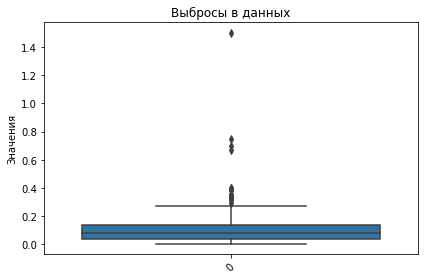

In [53]:
sns.boxplot(data=filter_ratio)
plt.title('Выбросы в данных')
plt.ylabel('Значения')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
filter_ratio.head(10)

city
stresa         1.500000
nevyansk       0.750000
miass          0.700000
manama         0.666667
bogolyubovo    0.400000
amiens         0.400000
rzhev          0.388889
ljubljana      0.387097
cadiz          0.357143
catania        0.352941
Name: unique_events, dtype: float64

Наблюдаем, что для большинства городов соотношение посещений страницы и использования фильтров >0.35, в то время как для города stresa это значение равно 1.5. Однако, количество событий в этом городе в целом очень мало, поэтому данный выброс можно считать статистически не значимым.

5. Соотношение общего числа событий и уникальных событий

In [55]:
ratio = df.groupby('event_action')[['total_events', 'unique_events']].sum()

In [57]:
ratio['ratio'] = ratio['total_events'] / ratio['unique_events']

In [58]:
ratio 

,total_events,unique_events,ratio
event_action,,,
Page Visit,2124963,1384449,1.534880
clear_filter_mobile,3598,2787,1.290994
dates_filter_mobile,13037,10271,1.269302
end_date_click,14638,11738,1.247061
filters-categories_click,80065,62539,1.280241
pay-type_checkbox,7321,5465,1.339616
price_button_close,14246,11645,1.223358
price_button_submit,71889,63062,1.139973
price_first,8572,6676,1.284002


Видим, что у search-tools-button_open коэффициент почти равен единице, то есть люди, как правило, нажимают кнопку поиска один раз, а затем работают в открывшемся окне, не закрывая его. Самые высокие показатели у Page Visit (пользователи посещают страницу города несколько раз) и у price_third (что может быть вызвано некорректной или неочевидной работой расчёта цены по третьему методу).